In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
train = pd.read_csv("all-gendered.csv")

train.head()

,Sentence,Label,Severity,Sadness,Pessimism,Sense_of_failure,Loss_of_Pleasure,Guilty_feelings,Sense_of_punishment,Self-dislike,...,Tiredness_or_fatigue,Loss_of_interest_in_sex,Subject,Gender,Affective,Motivational,Cognitive,Cog_distortions,Behavioral,Physiological
0,I just cant say anything to her because I dont...,1,1,0,0,0,1,0,0,0,...,0,0,Subject 1272,0,1,0,0,0,0,0
1,Im saying I want to die,1,1,0,0,0,0,0,0,0,...,0,0,Subject 1272,0,0,1,0,0,0,0
2,I found someone I love and truly want to be wi...,1,1,0,0,0,1,0,0,0,...,0,0,Subject 1272,0,1,0,0,0,0,0
3,Never have I ever had suicidal thoughts.,1,1,0,0,0,0,0,0,0,...,0,0,Subject 1272,0,0,1,0,0,0,0
4,Youll cry yourself to sleep,1,3,0,0,0,0,0,0,0,...,0,0,Subject 1272,0,1,0,0,0,0,0


In [4]:
train = train.drop_duplicates()

In [5]:
train = train[train['Label'].notna()]
train = train[train['Sentence'].notna()]

**Basic statistics**

In [6]:
len(train)

1098

In [7]:
len(train[train['Label']==1]) #64.45 percent

549

**Number of sentences for each symptom**

In [8]:
for name in train.columns:
    count = train[name].value_counts()
    print(count)

Sentence
Thank you!                                                                                                                                                                                  2
Fuck off Gary I'm not coming in                                                                                                                                                             1
But if you are dead set on royal carribean, book a less flashy ship (think radiance class) with a sailing length greater than one week, preferably when school is still in session.         1
Probably too much lol                                                                                                                                                                       1
As people with a run down house who have always lived in poverty they might know they would do you more harm than good - or they might just want to go back to watching TV and sleeping.    1
                                         

In [14]:
unique_subjects = train['Subject'].unique()
counts = []
names = []

for value in unique_subjects:
    names.append(value)
    counts.append(len(train[train['Subject'] == value]))

for i in range(len(counts)):
    print(f"Number of sentences from {names[i]}: {counts[i]}")

Number of sentences from Subject 1272: 5
Number of sentences from Subject 2341: 19
Number of sentences from Subject 2432: 15
Number of sentences from Subject 2827: 133
Number of sentences from Subject 3707: 93
Number of sentences from Subject 2903: 10
Number of sentences from Subject 9218: 17
Number of sentences from Subject 2961: 37
Number of sentences from Subject 9798: 18
Number of sentences from Subject 3993: 44
Number of sentences from Subject 4058: 9
Number of sentences from Subject 436.: 2
Number of sentences from Subject 5791: 16
Number of sentences from Subject 5897: 2
Number of sentences from Subject 6619: 17
Number of sentences from Subject 6635: 33
Number of sentences from Subject 9694: 15
Number of sentences from Subject 6900: 24
Number of sentences from Subject 7039: 26
Number of sentences from Subject 9454: 14
Number of sentences from Subject 100: 26
Number of sentences from Subject 101: 19
Number of sentences from Subject 102: 18
Number of sentences from Subject 103: 23

In [9]:
train.columns[26:32]

Index(['Affective', 'Motivational', 'Cognitive', 'Cog_distortions',
       'Behavioral', 'Physiological'],
      dtype='object')

Male Pos Count for  Affective :  134
Male Neg Count for  Affective :  290
Female Pos Count for  Affective :  175
Female Neg Count for  Affective :  499
Male Pos Count for  Motivational :  29
Male Neg Count for  Motivational :  395
Female Pos Count for  Motivational :  83
Female Neg Count for  Motivational :  591
Male Pos Count for  Cognitive :  20
Male Neg Count for  Cognitive :  404
Female Pos Count for  Cognitive :  15
Female Neg Count for  Cognitive :  659
Male Pos Count for  Cog_distortions :  36
Male Neg Count for  Cog_distortions :  388
Female Pos Count for  Cog_distortions :  84
Female Neg Count for  Cog_distortions :  590
Male Pos Count for  Behavioral :  34
Male Neg Count for  Behavioral :  390
Female Pos Count for  Behavioral :  69
Female Neg Count for  Behavioral :  605
Male Pos Count for  Physiological :  9
Male Neg Count for  Physiological :  415
Female Pos Count for  Physiological :  10
Female Neg Count for  Physiological :  664


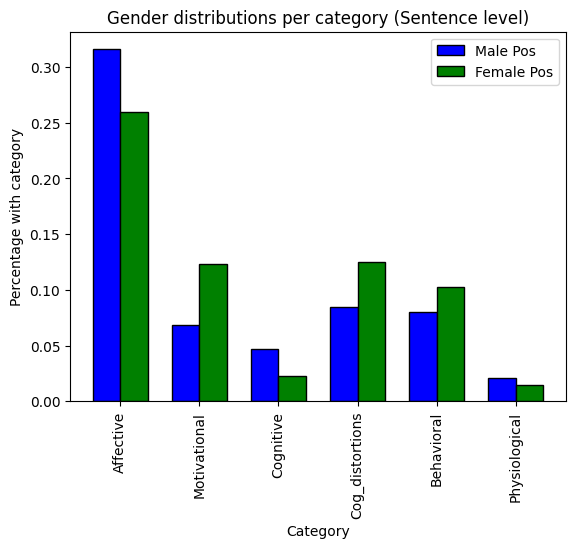

In [13]:
#gender distribution per category on a sentence level

male_pos_perc = []
male_neg_perc = []
fem_pos_perc = []
fem_neg_perc = []
cat_names = []
male_pos_counts = []
male_neg_counts = []
fem_pos_counts = []
fem_neg_counts = []

for name in train.columns[26:32]:
    cat_names.append(name)
    male_pos_count = ((train['Gender'] == 0) & (train[name] == 1)).sum()
    male_neg_count = ((train['Gender'] == 0) & (train[name] == 0)).sum()
    fem_pos_count = ((train['Gender'] == 1) & (train[name] == 1)).sum()
    fem_neg_count = ((train['Gender'] == 1) & (train[name] == 0)).sum()
    male_pos_counts.append(male_pos_count)
    male_neg_counts.append(male_neg_count)
    fem_pos_counts.append(fem_pos_count)
    fem_neg_counts.append(fem_neg_count)
    print("Male Pos Count for ", name, ": ", male_pos_count)
    print("Male Neg Count for ", name, ": ", male_neg_count)
    print("Female Pos Count for ", name, ": ", fem_pos_count)
    print("Female Neg Count for ", name, ": ", fem_neg_count)
    #labels = 'Male Pos', 'Male Neg', 'Female Pos', 'Female Neg'
    male = male_pos_count+male_neg_count
    fem = fem_pos_count+fem_neg_count
    male_pos_perc.append(male_pos_count/male)
    male_neg_perc.append(male_neg_count/male)
    fem_pos_perc.append(fem_pos_count/fem)
    fem_neg_perc.append(fem_neg_count/fem)

r= np.arange(6)
width = 0.35
        
bar1 = plt.bar(r, male_pos_perc, color='b', width = width, edgecolor = 'black', label = "Male Pos")
bar3 = plt.bar(r+width, fem_pos_perc, color = 'g', width = width, edgecolor = 'black', label = "Female Pos")
  
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel("Category") 
plt.ylabel("Percentage with category") 
plt.title("Gender distributions per category (Sentence level)") 
   
plt.xticks(r + width/2,cat_names, rotation=90) 
plt.legend() 
      
plt.show() 

Male Pos Count for  Affective :  11
Male Neg Count for  Affective :  0
Female Pos Count for  Affective :  7
Female Neg Count for  Affective :  2
Male Pos Count for  Motivational :  10
Male Neg Count for  Motivational :  1
Female Pos Count for  Motivational :  6
Female Neg Count for  Motivational :  3
Male Pos Count for  Cognitive :  7
Male Neg Count for  Cognitive :  4
Female Pos Count for  Cognitive :  5
Female Neg Count for  Cognitive :  4
Male Pos Count for  Cog_distortions :  10
Male Neg Count for  Cog_distortions :  1
Female Pos Count for  Cog_distortions :  7
Female Neg Count for  Cog_distortions :  2
Male Pos Count for  Behavioral :  9
Male Neg Count for  Behavioral :  2
Female Pos Count for  Behavioral :  7
Female Neg Count for  Behavioral :  2
Male Pos Count for  Physiological :  5
Male Neg Count for  Physiological :  6
Female Pos Count for  Physiological :  5
Female Neg Count for  Physiological :  4


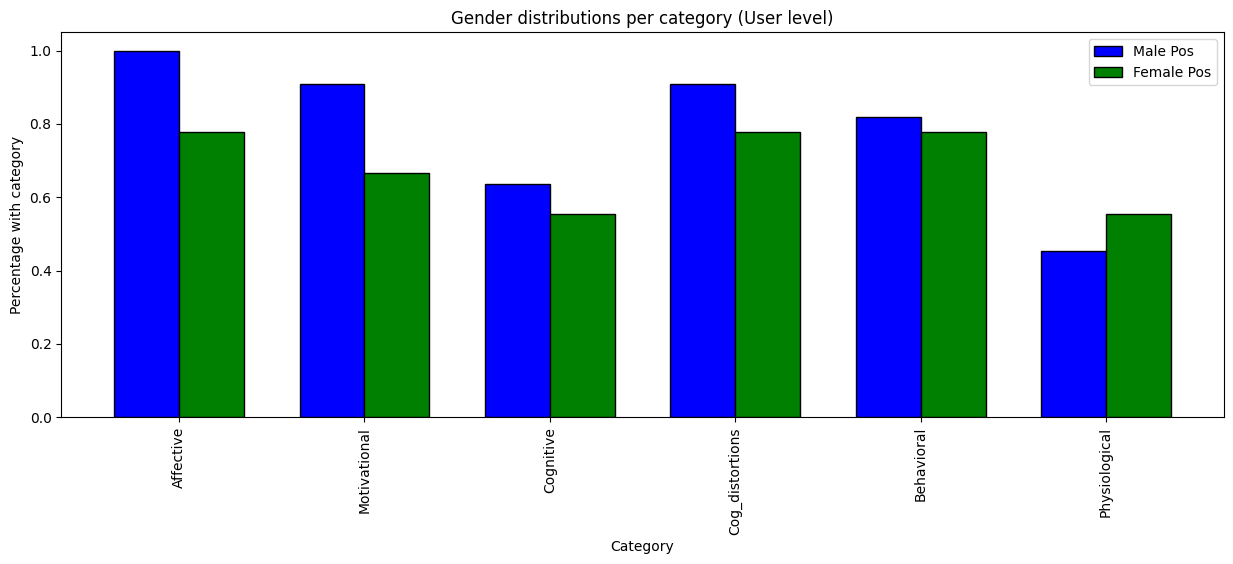

In [16]:
#gender distribution per symptom on a user level

male_pos_perc = []
male_neg_perc = []
fem_pos_perc = []
fem_neg_perc = []
cat_names = []

male = []
fem = []

for user in unique_subjects:
    cat = []
    user_df = train[train['Subject'] == user]
    #print(user_df)
    for name in train.columns[26:32]:
        if (user_df[name]==1).any():
            cat.append(name)   
    if user_df['Gender'].unique()==0:
        male.append(cat)
    else:
        fem.append(cat)

for name in train.columns[26:32]:
    cat_names.append(name)
    male_pos_count = sum(sublist.count(name) for sublist in male)
    male_neg_count = 11-male_pos_count
    fem_pos_count = sum(sublist.count(name) for sublist in fem)
    fem_neg_count = 9-fem_pos_count
    print("Male Pos Count for ", name, ": ", male_pos_count)
    print("Male Neg Count for ", name, ": ", male_neg_count)
    print("Female Pos Count for ", name, ": ", fem_pos_count)
    print("Female Neg Count for ", name, ": ", fem_neg_count)
    #labels = 'Male Pos', 'Male Neg', 'Female Pos', 'Female Neg'
    male_sum = male_pos_count+male_neg_count
    fem_sum = fem_pos_count+fem_neg_count
    male_pos_perc.append(male_pos_count/male_sum)
    male_neg_perc.append(male_neg_count/male_sum)
    fem_pos_perc.append(fem_pos_count/fem_sum)
    fem_neg_perc.append(fem_neg_count/fem_sum)


r= np.arange(6)
width = 0.35
        
bar1 = plt.bar(r, male_pos_perc, color='b', width = width, edgecolor = 'black', label = "Male Pos")
bar3 = plt.bar(r+width, fem_pos_perc, color = 'g', width = width, edgecolor = 'black', label = "Female Pos")
  
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel("Category") 
plt.ylabel("Percentage with category") 
plt.title("Gender distributions per category (User level)") 

plt.xticks(r + width/2,cat_names, rotation=90) 
plt.legend() 
      
plt.show()

In [17]:
#if there are 17 cells with values less than 5 -> fishers exact test

less_than_5 = 0

for value in male_pos_counts:
    if value < 5:
        less_than_5 += 1
for value in male_neg_counts:
    if value < 5:
        less_than_5 += 1
        
for value in fem_pos_counts:
    if value < 5:
        less_than_5 += 1

for value in fem_neg_counts:
    if value < 5:
        less_than_5 += 1

less_than_5

#-> chi square

0

In [19]:
# defining the table
p_values = []
for i in range(len(male_pos_counts)):
    data = [[male_pos_counts[i], male_neg_counts[i]], [fem_pos_counts[i], fem_neg_counts[i]]]
    print(data)
    stat, p, dof, expected = chi2_contingency(data)
    p_values.append(p)
 
    # interpret p-value
    alpha = 0.05
    print(train.columns[i+26])
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
        print('Observed pos proportion male: ', male_pos_counts[i]/212)
        print('Observed pos proportion female: ', fem_pos_counts[i]/337)
        print('Expected: ', expected)
        print('Expected pos proportion male: ', expected[0][0]/212)
        print('Expected pos proportion female: ', expected [1][0]/337)
    else:
        print('Independent (H0 holds true)')
    print("\n")

[[134, 290], [175, 499]]
Affective
p value is 0.05067412847940716
Independent (H0 holds true)


[[29, 395], [83, 591]]
Motivational
p value is 0.004862681563702738
Dependent (reject H0)
Observed pos proportion male:  0.13679245283018868
Observed pos proportion female:  0.24629080118694363
Expected:  [[ 43.24954463 380.75045537]
 [ 68.75045537 605.24954463]]
Expected pos proportion male:  0.2040072859744991
Expected pos proportion female:  0.2040072859744991


[[20, 404], [15, 659]]
Cognitive
p value is 0.034717661905707714
Dependent (reject H0)
Observed pos proportion male:  0.09433962264150944
Observed pos proportion female:  0.04451038575667656
Expected:  [[ 13.5154827 410.4845173]
 [ 21.4845173 652.5154827]]
Expected pos proportion male:  0.06375227686703097
Expected pos proportion female:  0.06375227686703096


[[36, 388], [84, 590]]
Cog_distortions
p value is 0.05062247356565301
Independent (H0 holds true)


[[34, 390], [69, 605]]
Behavioral
p value is 0.2621712999320518
Independe